# NYC Taxi Fare Prediction

In [21]:
import pandas as pd

In [22]:
df = pd.read_csv('taxifare.csv')

In [23]:
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2010-04-19 08:17:56 UTC,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1
1,2010-04-17 15:43:53 UTC,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1
2,2010-04-17 11:23:26 UTC,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2
3,2010-04-11 21:25:03 UTC,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1
4,2010-04-17 02:19:01 UTC,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1


In [24]:
df.shape

(120000, 8)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   pickup_datetime    120000 non-null  object 
 1   fare_amount        120000 non-null  float64
 2   fare_class         120000 non-null  int64  
 3   pickup_longitude   120000 non-null  float64
 4   pickup_latitude    120000 non-null  float64
 5   dropoff_longitude  120000 non-null  float64
 6   dropoff_latitude   120000 non-null  float64
 7   passenger_count    120000 non-null  int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 7.3+ MB


## Featuring Engineering

In [26]:
import datetime

In [27]:
pd.to_datetime(df['pickup_datetime'])

0        2010-04-19 08:17:56+00:00
1        2010-04-17 15:43:53+00:00
2        2010-04-17 11:23:26+00:00
3        2010-04-11 21:25:03+00:00
4        2010-04-17 02:19:01+00:00
                    ...           
119995   2010-04-18 14:33:03+00:00
119996   2010-04-23 10:27:48+00:00
119997   2010-04-18 18:50:40+00:00
119998   2010-04-13 08:14:44+00:00
119999   2010-04-17 16:00:14+00:00
Name: pickup_datetime, Length: 120000, dtype: datetime64[ns, UTC]

In [28]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime']) - datetime.timedelta(hours=4)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   pickup_datetime    120000 non-null  datetime64[ns, UTC]
 1   fare_amount        120000 non-null  float64            
 2   fare_class         120000 non-null  int64              
 3   pickup_longitude   120000 non-null  float64            
 4   pickup_latitude    120000 non-null  float64            
 5   dropoff_longitude  120000 non-null  float64            
 6   dropoff_latitude   120000 non-null  float64            
 7   passenger_count    120000 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(2)
memory usage: 7.3 MB


In [30]:
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2010-04-19 04:17:56+00:00,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1
1,2010-04-17 11:43:53+00:00,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1
2,2010-04-17 07:23:26+00:00,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2
3,2010-04-11 17:25:03+00:00,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1
4,2010-04-16 22:19:01+00:00,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1


In [31]:
df['Year'] = df['pickup_datetime'].dt.year
df['Month'] = df['pickup_datetime'].dt.month
df['Day'] = df['pickup_datetime'].dt.day
df['Hours'] = df['pickup_datetime'].dt.hour
df['Minutes'] = df['pickup_datetime'].dt.minute

In [32]:
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Day,Hours,Minutes
0,2010-04-19 04:17:56+00:00,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,2010,4,19,4,17
1,2010-04-17 11:43:53+00:00,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,2010,4,17,11,43
2,2010-04-17 07:23:26+00:00,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,2010,4,17,7,23
3,2010-04-11 17:25:03+00:00,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,2010,4,11,17,25
4,2010-04-16 22:19:01+00:00,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,2010,4,16,22,19


In [33]:
import numpy as np

In [34]:
df['mornight'] = np.where(df['Hours']<12,0,1)

In [35]:
df.drop('pickup_datetime', axis=1, inplace=True)

In [36]:
df.head()

,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Day,Hours,Minutes,mornight
0,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,2010,4,19,4,17,0
1,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,2010,4,17,11,43,0
2,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,2010,4,17,7,23,0
3,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,2010,4,11,17,25,1
4,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,2010,4,16,22,19,1


In [37]:
df['fare_class'].unique()

array([0, 1], dtype=int64)

In [38]:
def haversine(df):
    lat1 = np.radians(df["pickup_latitude"])
    lat2 = np.radians(df["dropoff_latitude"])
    
    dlat = np.radians(df["dropoff_latitude"] - df["pickup_latitude"])
    dlong = np.radians(df["dropoff_longitude"] - df["pickup_longitude"])
    
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlong/2)**2
    
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    r = 6371
    
    return c * r

In [39]:
df['Total Distance'] = haversine(df)
df.head()

,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Day,Hours,Minutes,mornight,Total Distance
0,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,2010,4,19,4,17,0,2.126312
1,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,2010,4,17,11,43,0,1.392307
2,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,2010,4,17,7,23,0,3.326763
3,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,2010,4,11,17,25,1,1.864129
4,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,2010,4,16,22,19,1,7.231321


In [40]:
df.drop(["pickup_longitude" , "pickup_latitude" , "dropoff_longitude" , "dropoff_latitude"], axis = 1, inplace = True)

In [41]:
df.head()

,fare_amount,fare_class,passenger_count,Year,Month,Day,Hours,Minutes,mornight,Total Distance
0,6.5,0,1,2010,4,19,4,17,0,2.126312
1,6.9,0,1,2010,4,17,11,43,0,1.392307
2,10.1,1,2,2010,4,17,7,23,0,3.326763
3,8.9,0,1,2010,4,11,17,25,1,1.864129
4,19.7,1,1,2010,4,16,22,19,1,7.231321


## Regression Model

In [44]:
X = df.iloc[:,1:]
Y = df.iloc[:,0]

###  Feature Importance

In [45]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,Y)

ExtraTreesRegressor()

### Graph Visualization 

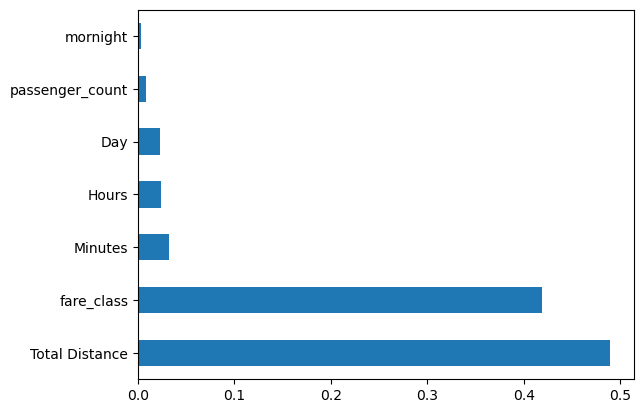

In [46]:
import matplotlib.pyplot as plt
feature_imp = pd.Series(model.feature_importances_, index=X.columns)
feature_imp.nlargest(7).plot(kind='barh')
plt.show()

In [47]:
X.head()

,fare_class,passenger_count,Year,Month,Day,Hours,Minutes,mornight,Total Distance
0,0,1,2010,4,19,4,17,0,2.126312
1,0,1,2010,4,17,11,43,0,1.392307
2,1,2,2010,4,17,7,23,0,3.326763
3,0,1,2010,4,11,17,25,1,1.864129
4,1,1,2010,4,16,22,19,1,7.231321


In [48]:
Y.head()

0     6.5
1     6.9
2    10.1
3     8.9
4    19.7
Name: fare_amount, dtype: float64

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=100)

#### xgboost Regressor

In [56]:
import xgboost
regressor = xgboost.XGBRFRegressor()
regressor.fit(X_train, Y_train)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None, gpu_id=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               n_estimators=100, n_jobs=None, num_parallel_tree=None,
               objective='reg:squarederror', predictor=None, random_state=None,
               reg_alpha=None, ...)

In [57]:
Y_pred = regressor.predict(X_test)

#### Visualization

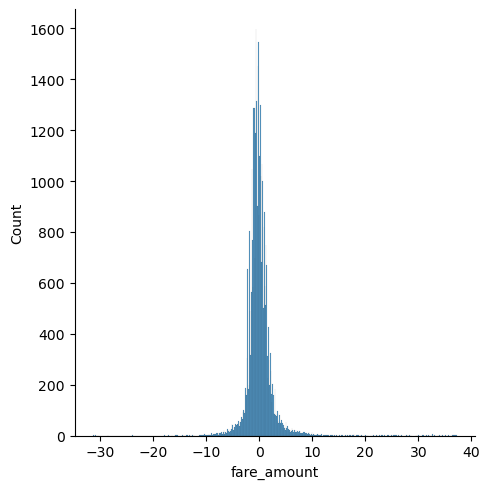

In [58]:
import seaborn as sns
sns.displot(Y_test - Y_pred)

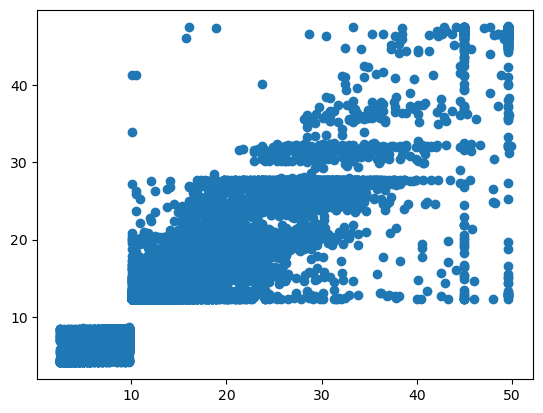

In [59]:
plt.scatter(Y_test, Y_pred)

In [60]:
from sklearn import metrics 
print('R Square :', np.sqrt(metrics.r2_score(Y_test, Y_pred)))
print('MAE      :', metrics.mean_absolute_error(Y_test, Y_pred))
print('MSE      :', metrics.mean_squared_error(Y_test, Y_pred))
print('RMSE     :', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

R Square : 0.9398623524214136
MAE      : 1.4400353970914417
MSE      : 6.673566383959197
RMSE     : 2.583324676450716


### HyperParameter Tuning

In [61]:
from sklearn.model_selection import RandomizedSearchCV

#### RandomizedSearchCV

In [62]:
#Number of trees in Xgboost
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]

#Various Learning Rate Parameters
learning_rate = ['0.05', '0.1', '0,2', '0.3', '0.5', '0.6']

#Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]

#Sub-sample Parameter Values
subsample = [0.7, 0.6, 0.8]

#Minimum Child Weight Parameters
min_child_weight = [3, 4, 5, 6, 7]

#### Creating a Random Grid

In [63]:
random_grid = {'n_estimators': n_estimators,
              'learning_rate': learning_rate,
              'max_depth': max_depth,
              'subsample': subsample,
              'min_child_weight': min_child_weight}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'learning_rate': ['0.05', '0.1', '0,2', '0.3', '0.5', '0.6'], 'max_depth': [5, 10, 15, 20, 25, 30], 'subsample': [0.7, 0.6, 0.8], 'min_child_weight': [3, 4, 5, 6, 7]}


In [64]:
regressor = xgboost.XGBRegressor()

In [65]:
xg_random = RandomizedSearchCV(estimator = regressor, param_distributions = random_grid, scoring = 'neg_mean_squared_error', n_iter = 10, cv = 5, verbose = 2, random_state = 42, n_jobs = -1)

In [66]:
xg_random.fit(X_train, Y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\Users\amogh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
5 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\amogh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\amogh\anaconda3\lib\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
  File "C:\Users\amogh\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1025, in fit
    self._Booster = train(
  File "C:\Users\amogh\anaconda3\lib\site-packages\xgboost\core.py", line 620, 

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          num_parallel_tree=None,
                                          predictor=None, random_state=None, ...),
                   n_jobs=-1,
                   param_distributions={'learning_rate': ['0.05', '0.1', '0,2',
                                                          '0.3', '0.5', '0.6'],
                                        'max_depth': [5, 10, 15, 20, 25, 30],
                                        'min_child_weight': [3, 4, 5, 6, 7],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200],
                                        'subsample': [0.7, 0.6, 0.8]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [67]:
xg_random.best_params_

{'subsample': 0.6,
 'n_estimators': 1200,
 'min_child_weight': 5,
 'max_depth': 15,
 'learning_rate': '0.05'}

In [68]:
y_pred = xg_random.predict(X_test)

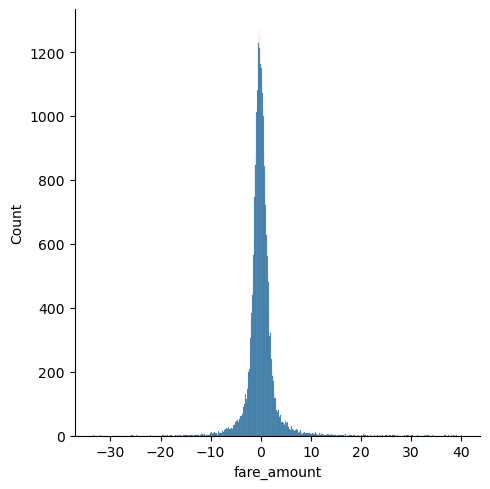

In [69]:
sns.displot(Y_test - y_pred)

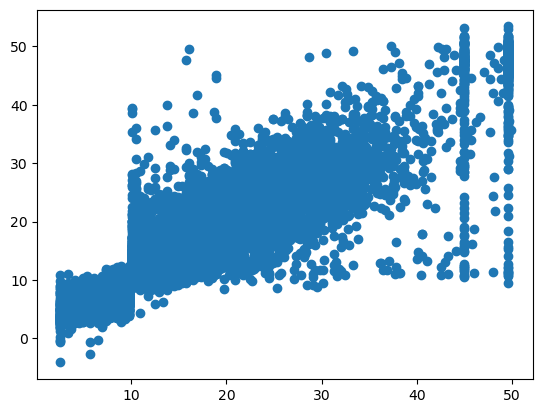

In [70]:
plt.scatter(Y_test, y_pred)

#### Model Evaluation Metrics

In [71]:
print('R Square :', np.sqrt(metrics.r2_score(Y_test, y_pred)))
print('MAE      :', metrics.mean_absolute_error(Y_test, y_pred))
print('MSE      :', metrics.mean_squared_error(Y_test, y_pred))
print('RMSE     :', np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))

R Square : 0.9269581973650708
MAE      : 1.5564888041515648
MSE      : 8.051641149937284
RMSE     : 2.8375413917575343


In [72]:
X.columns

Index(['fare_class', 'passenger_count', 'Year', 'Month', 'Day', 'Hours',
       'Minutes', 'mornight', 'Total Distance'],
      dtype='object')

In [73]:
X_test.head()

,fare_class,passenger_count,Year,Month,Day,Hours,Minutes,mornight,Total Distance
68388,0,1,2010,4,16,15,13,1,0.795891
98155,0,1,2010,4,15,15,28,1,1.327654
100520,0,1,2010,4,16,19,33,1,3.277121
119795,0,1,2010,4,23,2,10,0,1.901563
63040,0,5,2010,4,24,19,35,1,1.627122


## Artificial Neural Network

In [74]:
X_train.shape[1]

9

In [79]:
!pip install tensorflow

     -------------------------------------- 272.8/272.8 MB 2.9 MB/s eta 0:00:00
     ------------------------------------ 126.5/126.5 kB 213.0 kB/s eta 0:00:00
     ---------------------------------------- 1.2/1.2 MB 1.3 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
     ---------------------------------------- 57.5/57.5 kB 1.5 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 2.6 MB/s eta 0:00:00
     ---------------------------------------- 24.4/24.4 MB 5.0 MB/s eta 0:00:00
     ---------------------------------------- 5.6/5.6 MB 4.0 MB/s eta 0:00:00
     ---------------------------------------- 65.5/65.5 kB 1.8 MB/s eta 0:00:00
     -------------------------------

In [80]:
#Importing Keras Libraries and Packages
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU, PReLU, ELU
from tensorflow.keras.layers import Dropout


In [87]:
NN_model = Sequential()

#The input Layer
NN_model.add(Dense(128, kernel_initializer='normal', input_dim = X_train.shape[1], activation = 'relu'))

#The Hidden Layers
NN_model.add(Dense(256, kernel_initializer='normal', activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal', activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal', activation='relu'))

#The Output Layer
NN_model.add(Dense(1, kernel_initializer='normal', activation='linear'))

#Compiling the Network
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

#Fitting the ANN to the Training Set
model_history = NN_model.fit(X_train, Y_train, validation_split=0.33, batch_size = 10, epochs = 20)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 128)               1280      
                                                                 
 dense_21 (Dense)            (None, 256)               33024     
                                                                 
 dense_22 (Dense)            (None, 256)               65792     
                                                                 
 dense_23 (Dense)            (None, 256)               65792     
                                                                 
 dense_24 (Dense)            (None, 1)                 257       
                                                                 
Total params: 166,145
Trainable params: 166,145
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
5628/5628 [==========================

### Model Evaluation Metrics

In [91]:
prediction = NN_model.predict(X_test)

1125/1125 [==============================] - 3s 716us/step


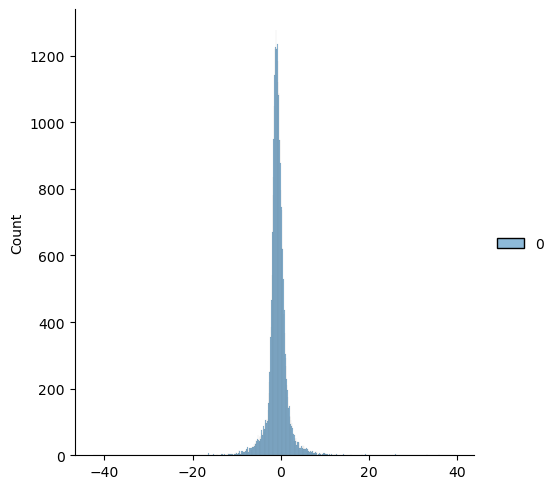

In [92]:
sns.displot(Y_test.values.reshape(-1,1) - prediction)

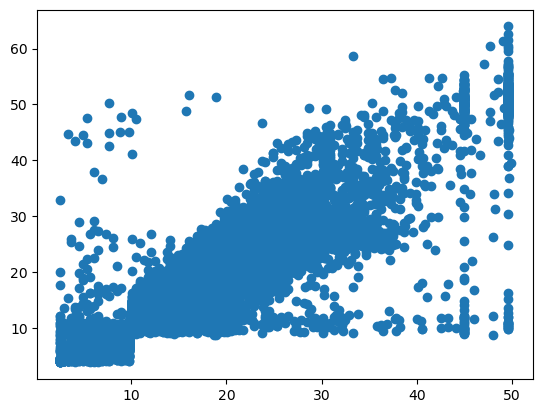

In [97]:
plt.scatter(Y_test,prediction)

In [98]:
print('MAE      :', metrics.mean_absolute_error(Y_test, prediction))
print('MSE      :', metrics.mean_squared_error(Y_test, prediction))
print('RMSE     :', np.sqrt(metrics.mean_squared_error(Y_test, prediction)))

MAE      : 1.6715108882927894
MSE      : 9.303915902517529
RMSE     : 3.050232106335111


### Regression Model Evaluation Metrics 
<p> R Square : 0.9398623524214136 <br>
MAE      : 1.4400353970914417<br>
MSE      : 6.673566383959197<br>
RMSE     : 2.583324676450716 </p>

#### Regression Model Evaluation Mentrics After Hyperparameter Tuning
<p>R Square : 0.9269581973650708<br>
MAE      : 1.5564888041515648<br>
MSE      : 8.051641149937284<br>
RMSE     : 2.8375413917575343</p><br>

### Classification Model Evaluation Metrics
<p>MAE      : 1.6715108882927894<br>
MSE      : 9.303915902517529<br>
RMSE     : 3.050232106335111</p>